# Exploracion porfunda.

## Importaciones

In [1]:

%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
# El mantra de las visualizaciones
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import sys
sys.path.append('../tools')
import manipuladora as mp


from sklearn.model_selection import train_test_split as tts

from sklearn import metrics

## Cargo los datos

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

### Features
* id: only for test & sample submission files, id for prediction sample identification
* price: price in USD
* carat: weight of the diamond
* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color: diamond colour
* clarity: a measurement of how clear the diamond is
* x: length in mm
* y: width in mm
* z: depth in mm
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table: width of top of diamond relative to widest point (43--95)

In [3]:
train.sample(3)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
24075,24075,1.00,Fair,G,SI1,66.1,62.0,6.10,6.03,4.01,3700
22379,22379,1.21,Ideal,F,VS2,62.9,54.0,6.82,6.78,4.28,8557
37571,37571,0.50,Premium,F,VS1,61.8,60.0,5.10,5.06,3.14,1838


In [4]:
train.shape

(40455, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [6]:
train.describe()

,id,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.798406,61.744793,57.450157,5.733269,5.736107,3.539249,3939.026968
std,11678.496907,0.473424,1.430860,2.235814,1.120257,1.119260,0.693619,3995.017122
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,327.000000
25%,10113.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,949.000000
50%,20227.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2404.000000
75%,30340.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5331.000000
max,40454.000000,5.010000,79.000000,95.000000,10.740000,31.800000,6.980000,18818.000000


 ![Imagen](../img/escala-colores-fancy.png)

 ![Imagen](../img/escala-gia-claridad-diamantes-1.jpg)

## Mirada a la 'Carat' y demas columnas

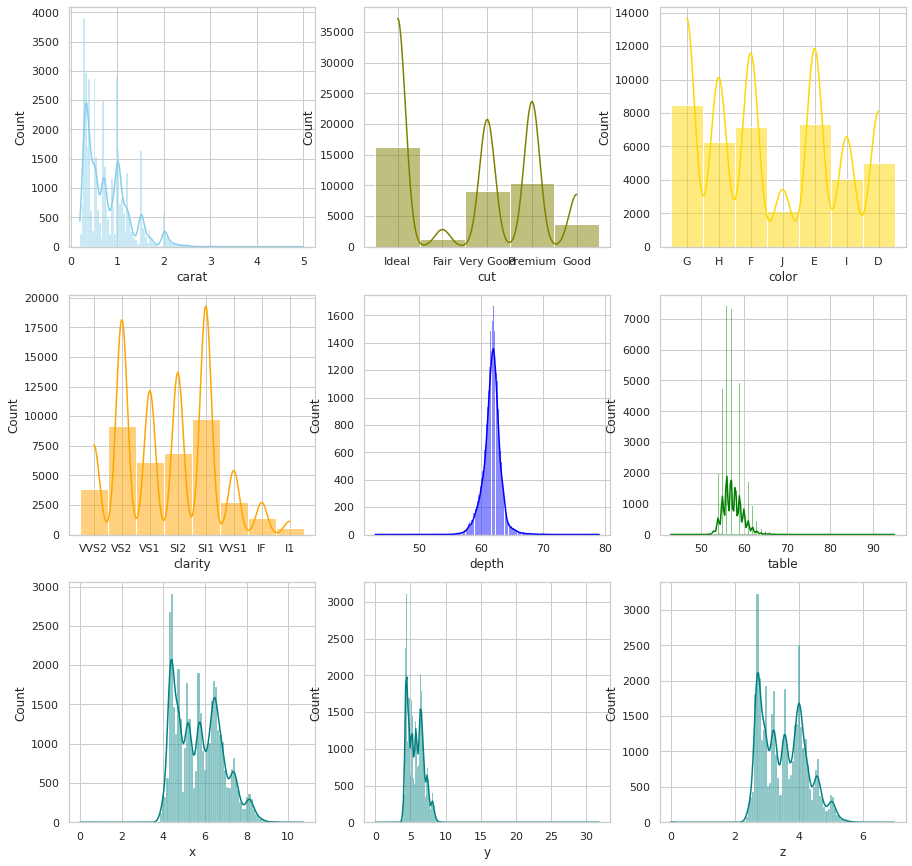

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

sns.histplot(data=train, x="carat", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=train, x="cut", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=train, x="color", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=train, x="clarity", kde=True, color="orange", ax=axs[1, 0])
sns.histplot(data=train, x="depth", kde=True, color="blue", ax=axs[1, 1])
sns.histplot(data=train, x="table", kde=True, color="green", ax=axs[1, 2])
sns.histplot(data=train, x="x", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=train, x="y", kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data=train, x="z", kde=True, color="teal", ax=axs[2, 2])
plt.show()

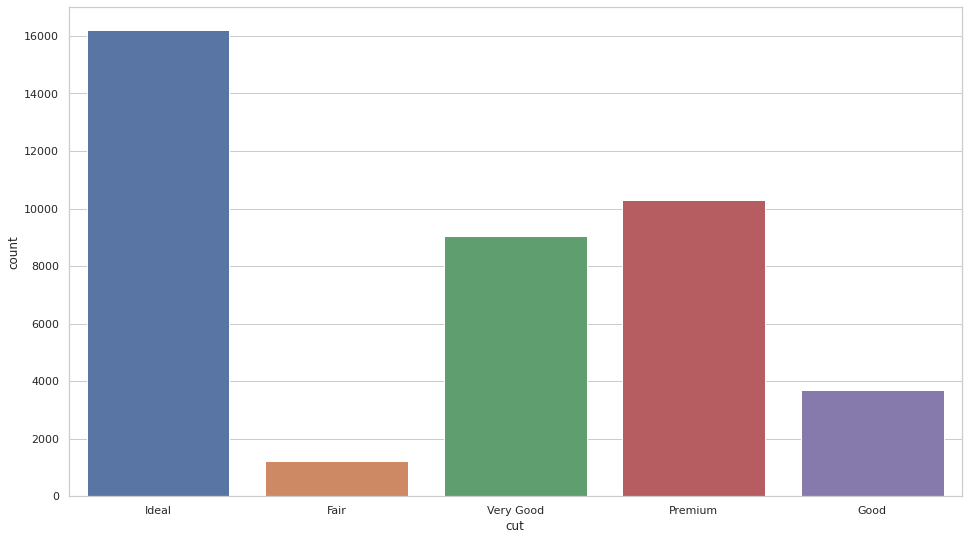

In [8]:
sns.countplot(x="cut", data=train);

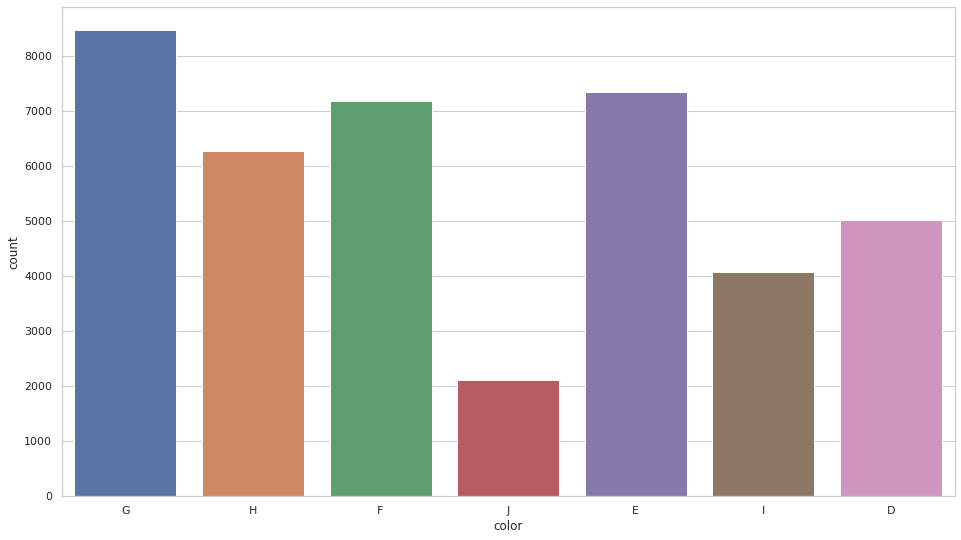

In [9]:
sns.countplot(x="color", data=train);

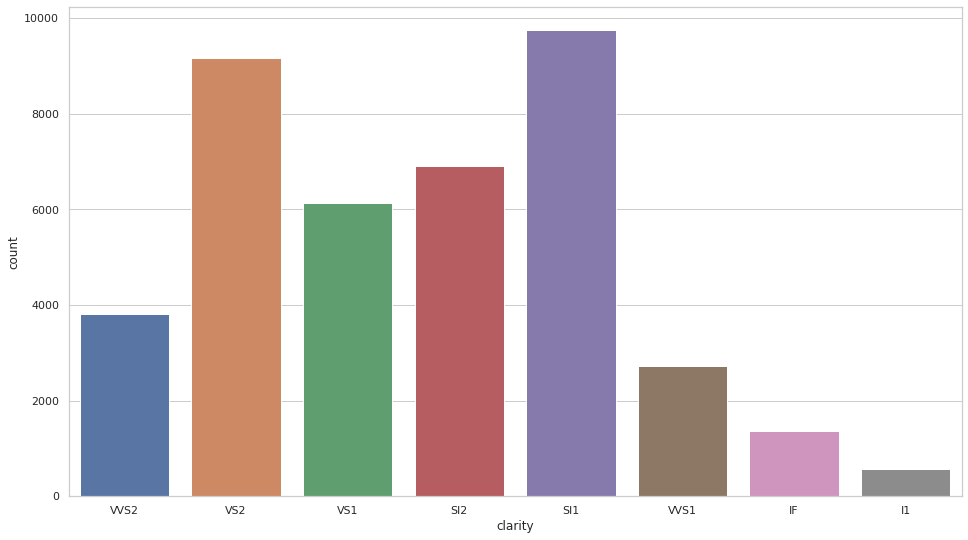

In [10]:
sns.countplot(x="clarity", data=train);

<AxesSubplot:xlabel='carat', ylabel='Count'>

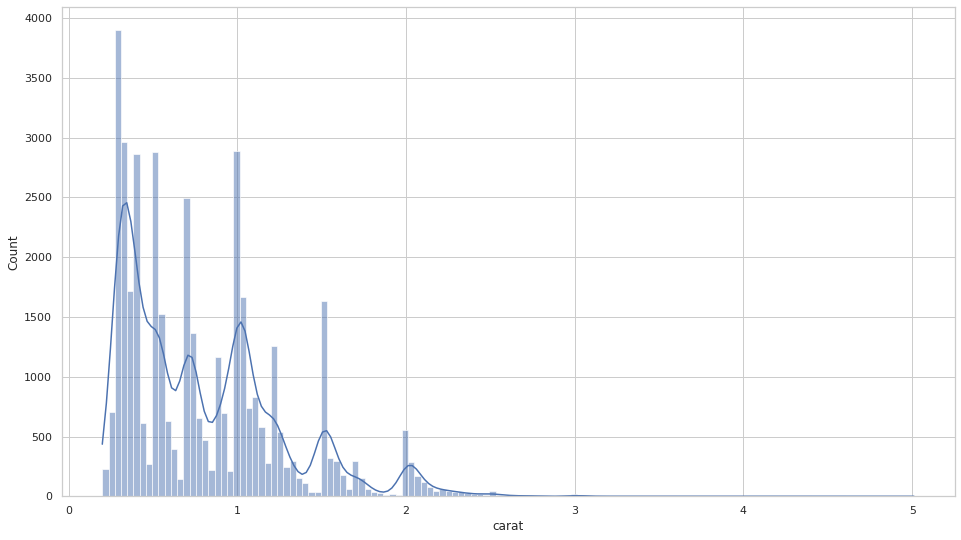

In [11]:
sns.histplot(x=train['carat'],kde=True)

solo por pintar lineas, y ver un poco por donde van los valores

<AxesSubplot:xlabel='carat', ylabel='price'>

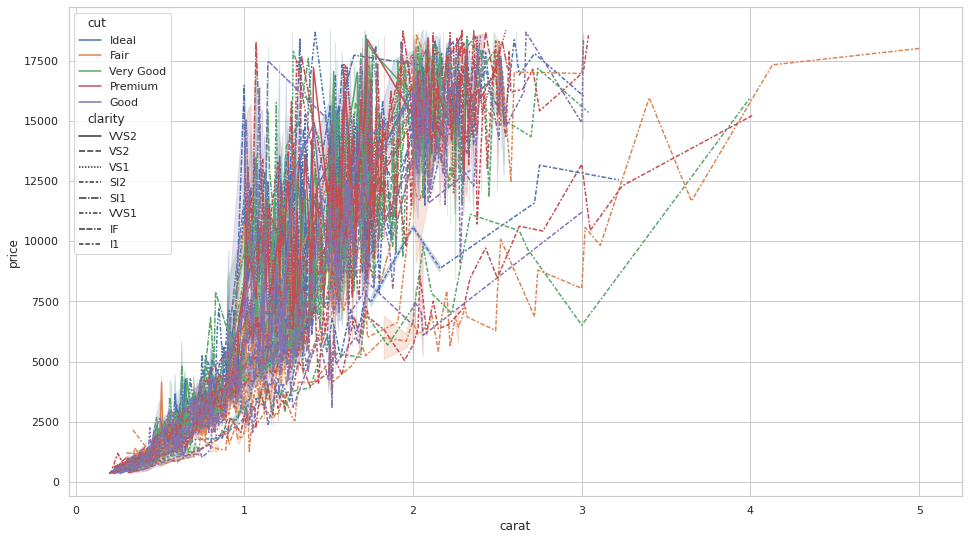

In [12]:
sns.lineplot(x="carat", y="price",hue="cut", style="clarity", data=train)

<AxesSubplot:xlabel='price', ylabel='carat'>

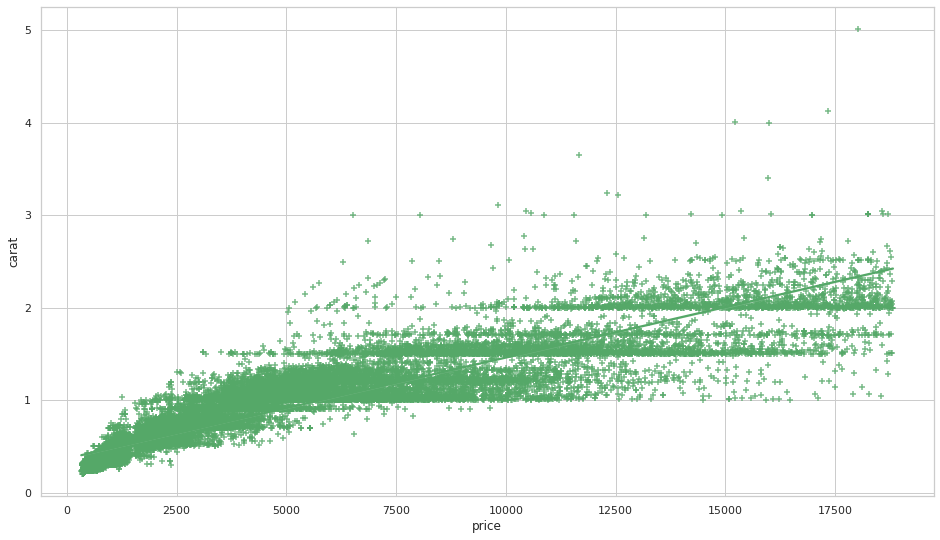

In [13]:
sns.regplot(x=train.price,y=train.carat , marker="+", color="g")

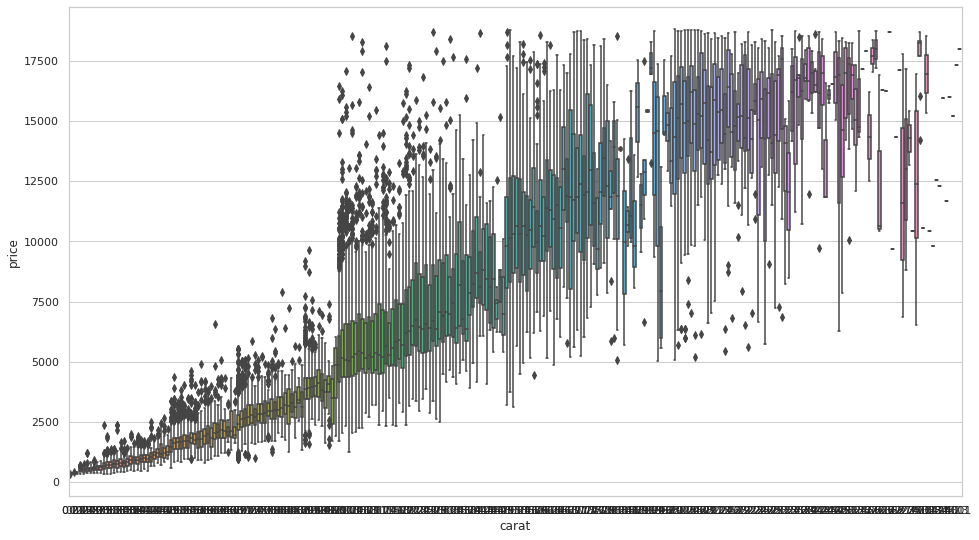

In [14]:
ax = sns.boxplot(x='carat', y ='price', data = train)

## Limpiamos a muerte, no quiero ceros ni outliers, vemos los que hay y los borramos

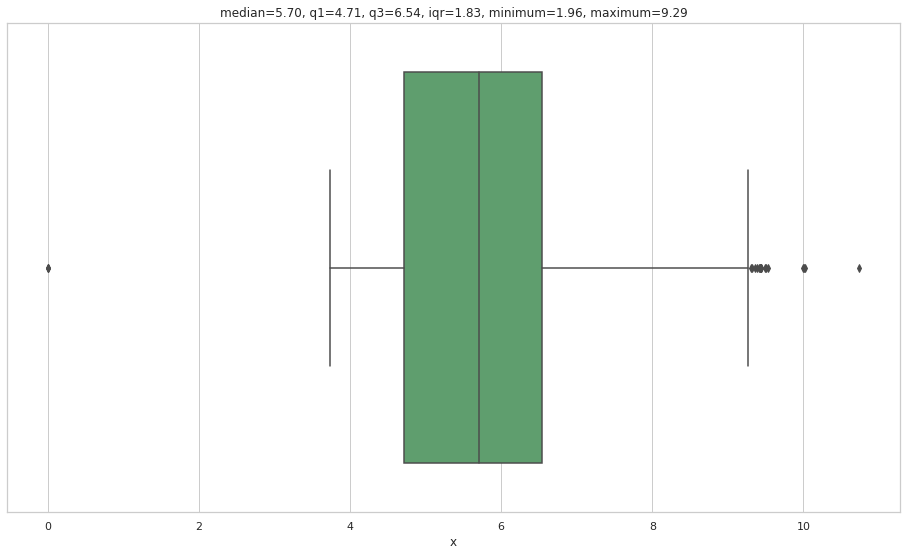

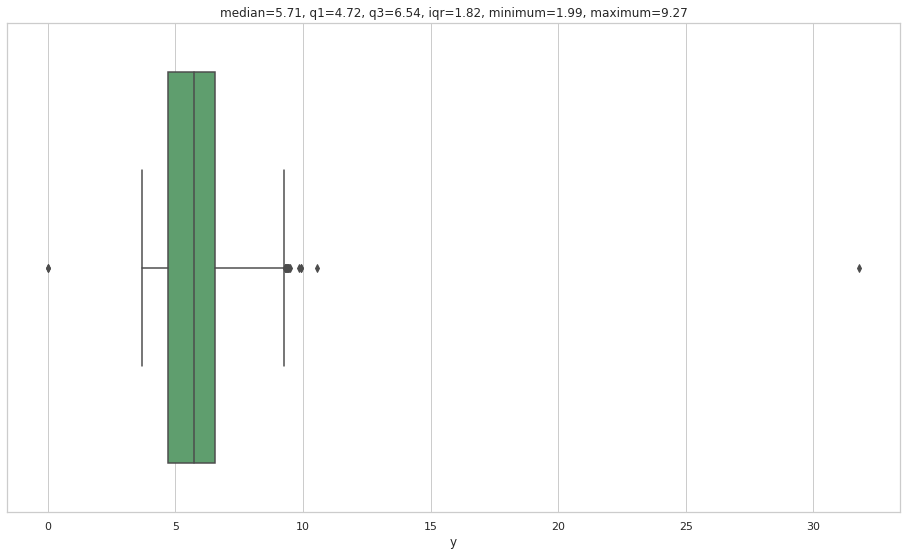

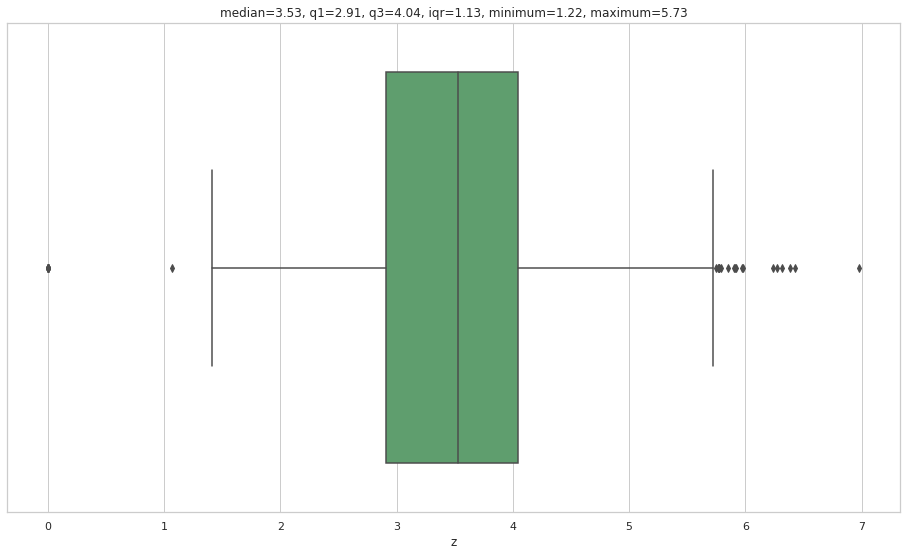

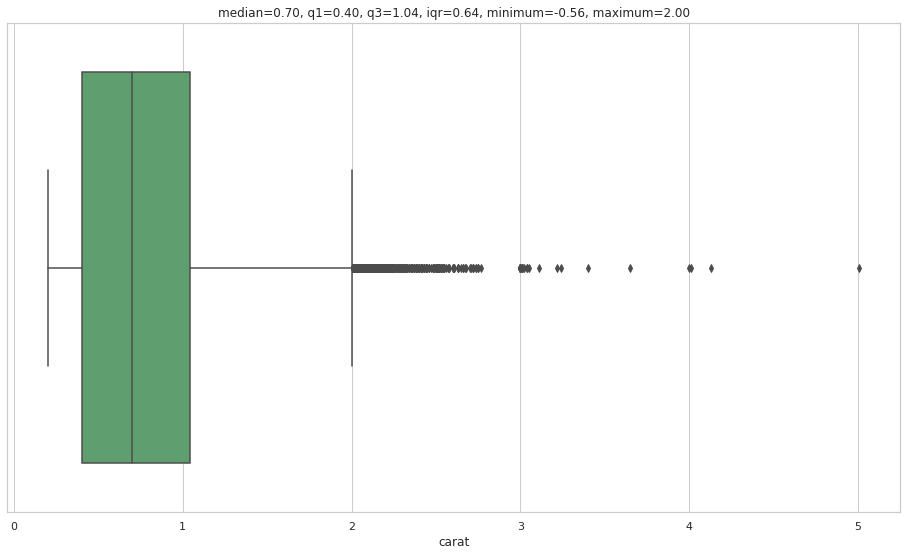

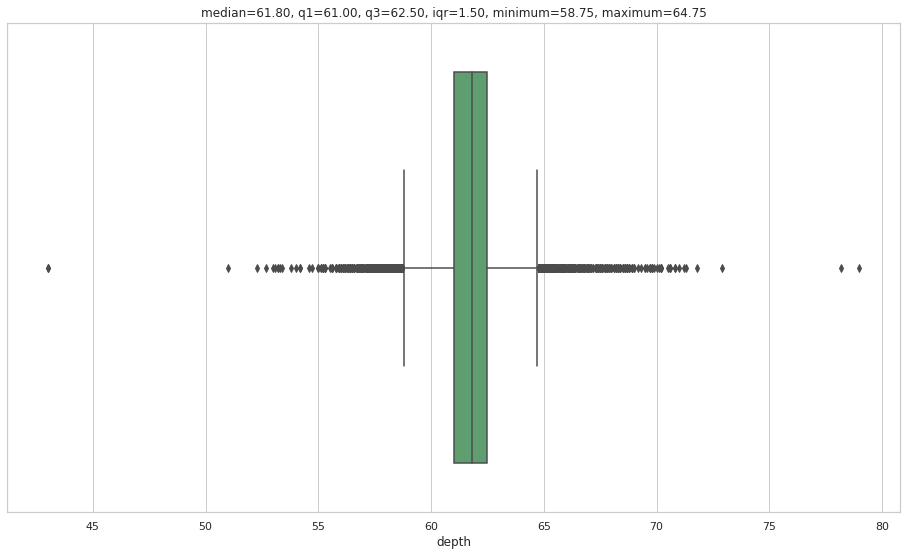

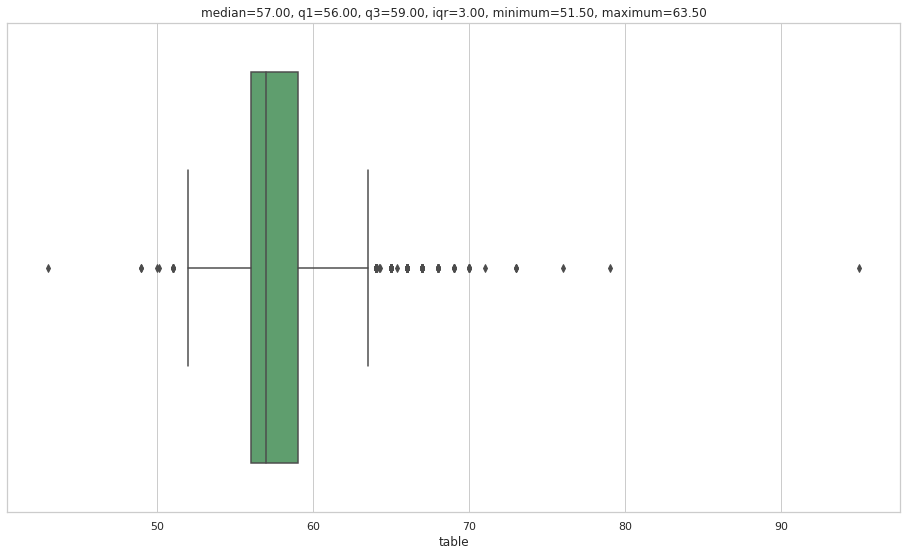

In [15]:
mp.box_plot(train, 'x')
mp.box_plot(train, 'y')
mp.box_plot(train, 'z')
mp.box_plot(train, 'carat')
mp.box_plot(train, 'depth')
mp.box_plot(train, 'table')


In [16]:
print(f"'x' tiene {mp.cuenta_outliers(train, 'x')} outliers")
print(f"'y' tiene {mp.cuenta_outliers(train, 'y')} outliers")
print(f"'z' tiene {mp.cuenta_outliers(train, 'z')} outliers")
print(f"'carat' tiene {mp.cuenta_outliers(train, 'carat')} outliers")
print(f"'depth' tiene {mp.cuenta_outliers(train, 'depth')} outliers")
print(f"'table' tiene {mp.cuenta_outliers(train, 'table')} outliers")

'x' tiene 20 outliers
'y' tiene 17 outliers
'z' tiene 31 outliers
'carat' tiene 1599 outliers
'depth' tiene 1896 outliers
'table' tiene 455 outliers


In [17]:
print(f"filas antes de borrar: {train.shape[0]}")
train = mp.borra_outliers(train, 'x')
train = mp.borra_outliers(train, 'y')
train = mp.borra_outliers(train, 'z')
train = mp.borra_outliers(train, 'carat')
train = mp.borra_outliers(train, 'depth')
train = mp.borra_outliers(train, 'table')
print(f"filas despues de borrar: {train.shape[0]}")

filas antes de borrar: 40455
filas despues de borrar: 36843


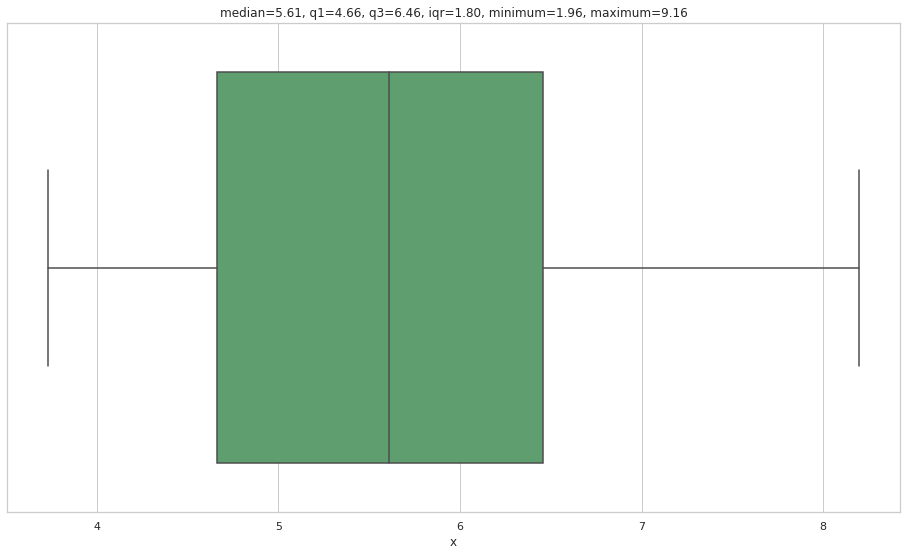

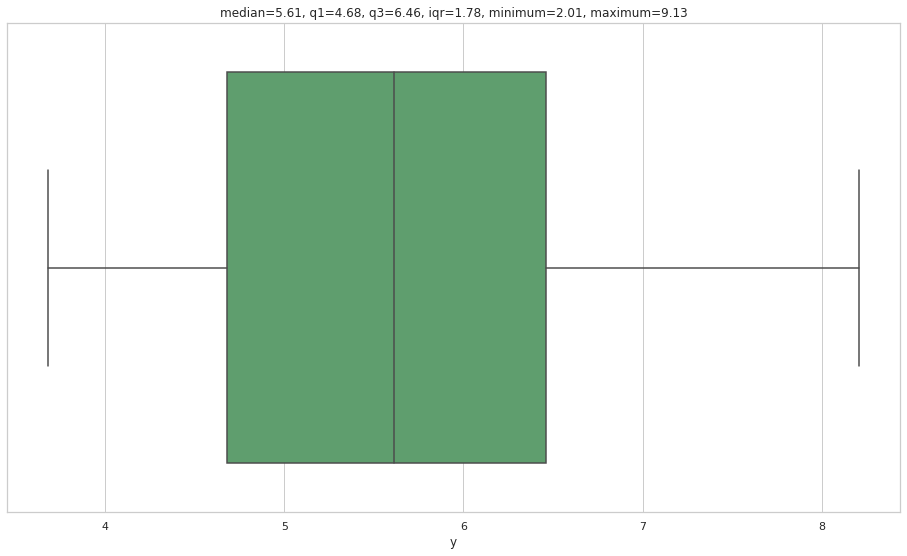

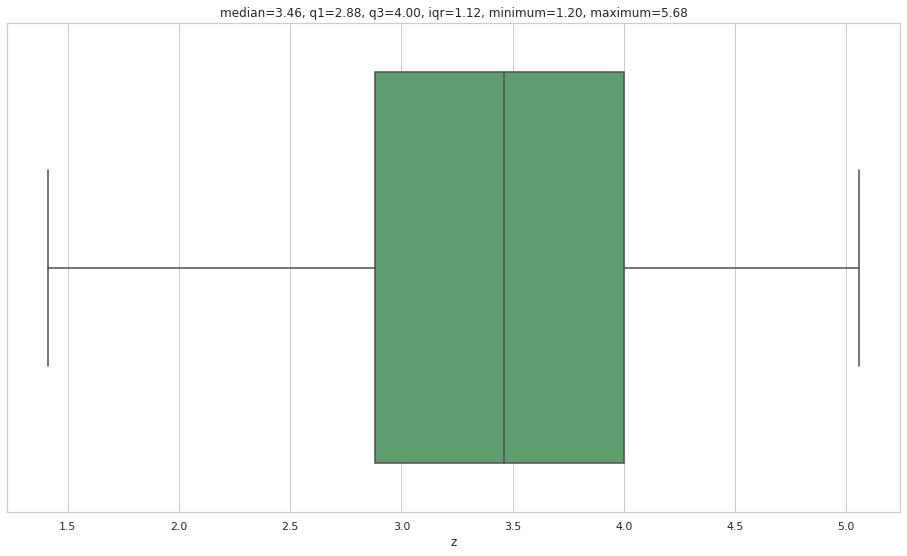

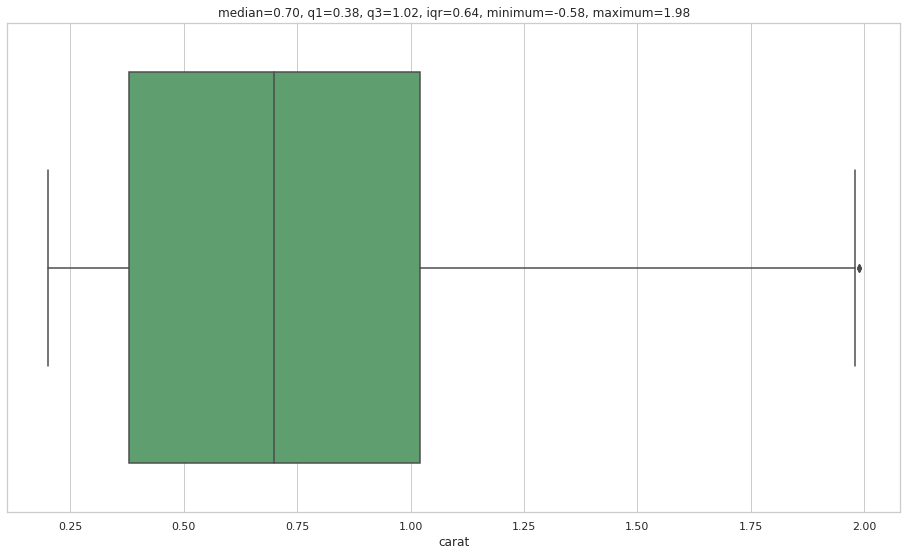

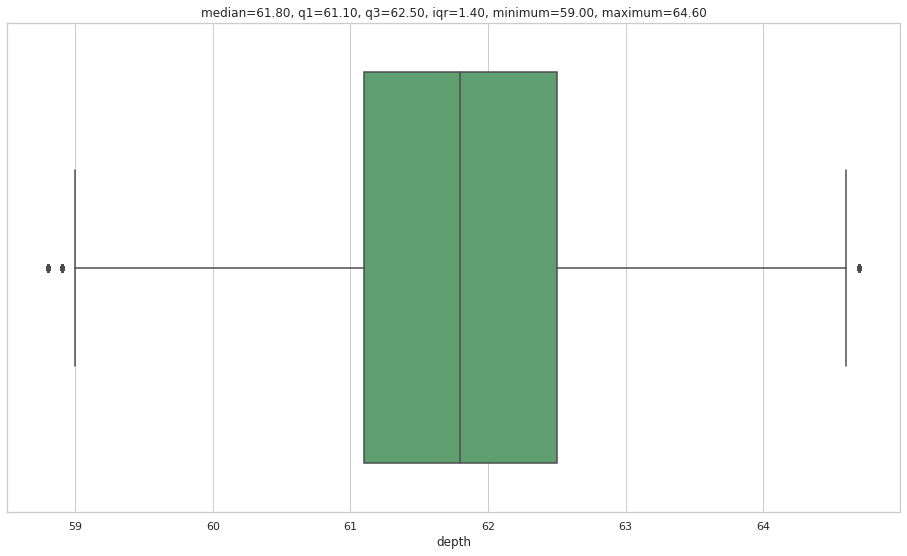

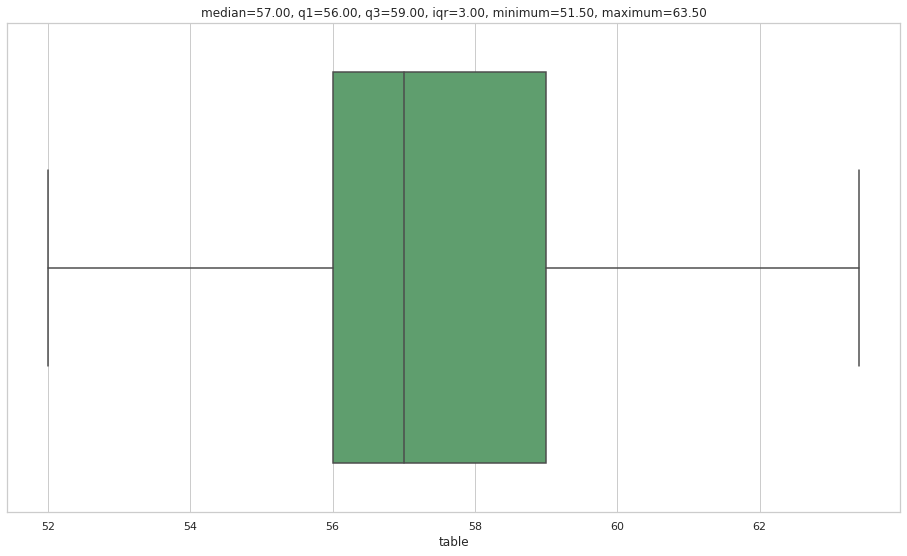

In [18]:
mp.box_plot(train, 'x')
mp.box_plot(train, 'y')
mp.box_plot(train, 'z')
mp.box_plot(train, 'carat')
mp.box_plot(train, 'depth')
mp.box_plot(train, 'table')

In [19]:
print(f"'x' tiene {mp.cuenta_outliers(train, 'x')} outliers")
print(f"'y' tiene {mp.cuenta_outliers(train, 'y')} outliers")
print(f"'z' tiene {mp.cuenta_outliers(train, 'z')} outliers")
print(f"'carat' tiene {mp.cuenta_outliers(train, 'carat')} outliers")
print(f"'depth' tiene {mp.cuenta_outliers(train, 'depth')} outliers")
print(f"'table' tiene {mp.cuenta_outliers(train, 'table')} outliers")

'x' tiene 0 outliers
'y' tiene 0 outliers
'z' tiene 0 outliers
'carat' tiene 6 outliers
'depth' tiene 509 outliers
'table' tiene 0 outliers


In [20]:
print(f"filas antes de borrar: {train.shape[0]}")
train = mp.borra_outliers(train, 'carat')
train = mp.borra_outliers(train, 'depth')
print(f"filas despues de borrar: {train.shape[0]}")

filas antes de borrar: 36843
filas despues de borrar: 36328


In [21]:
print(f"'carat' tiene {mp.cuenta_outliers(train, 'carat')} outliers")
print(f"'depth' tiene {mp.cuenta_outliers(train, 'depth')} outliers")

'carat' tiene 0 outliers
'depth' tiene 0 outliers


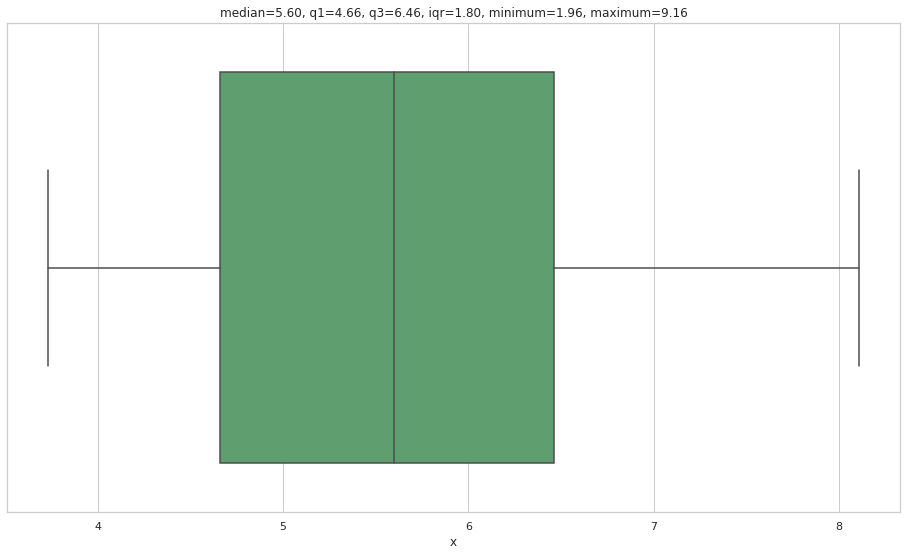

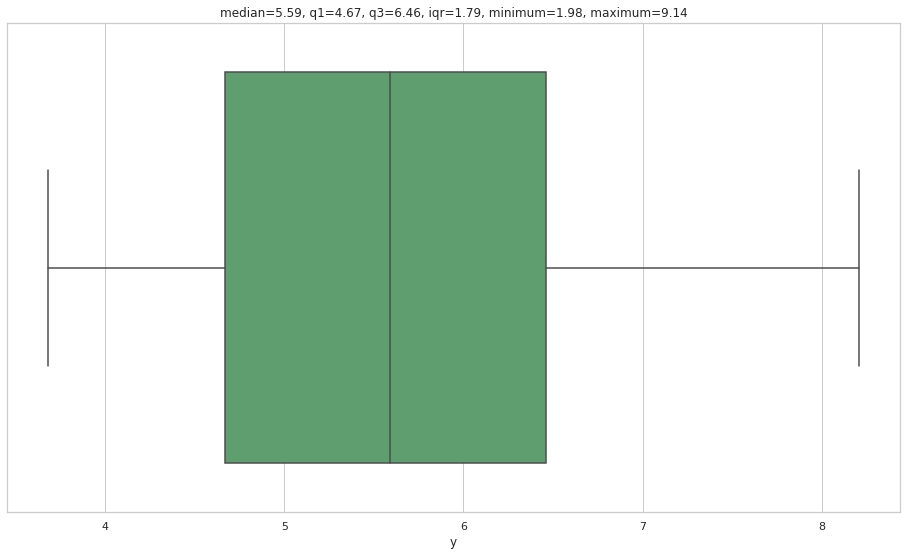

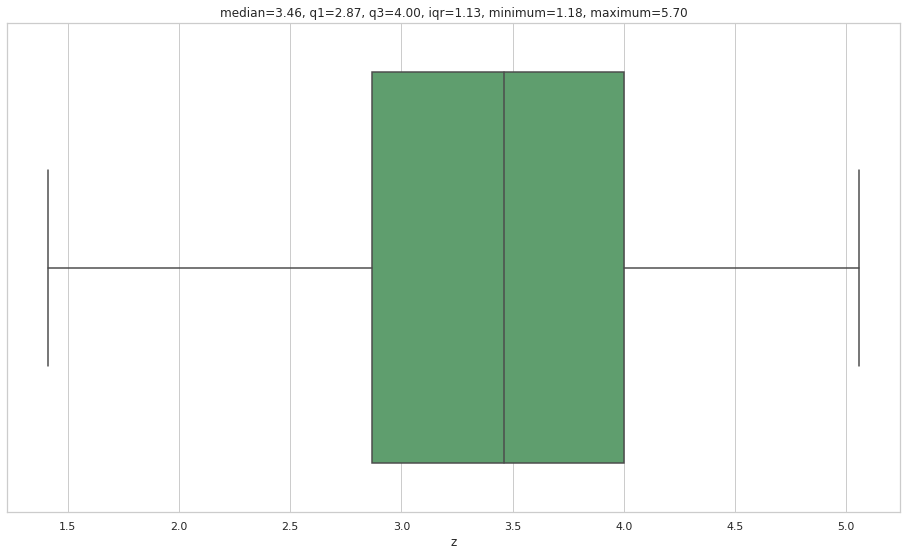

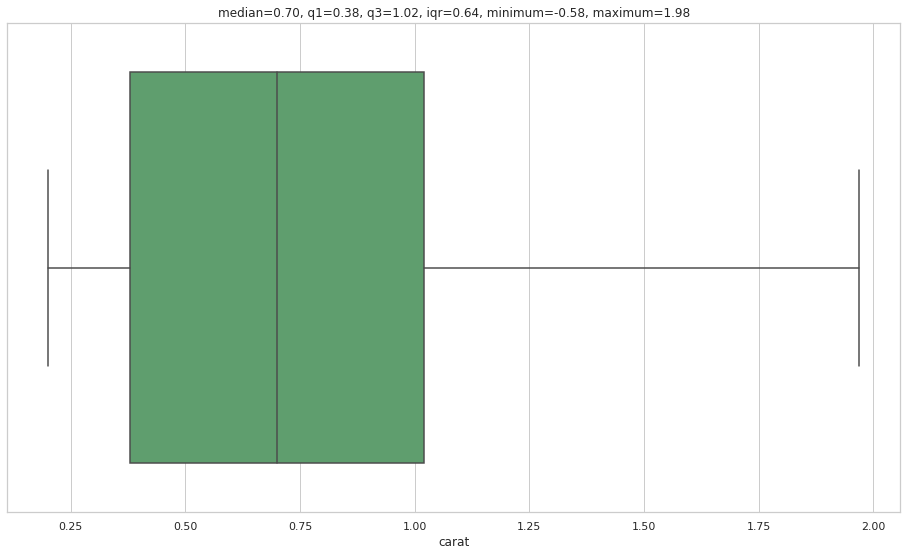

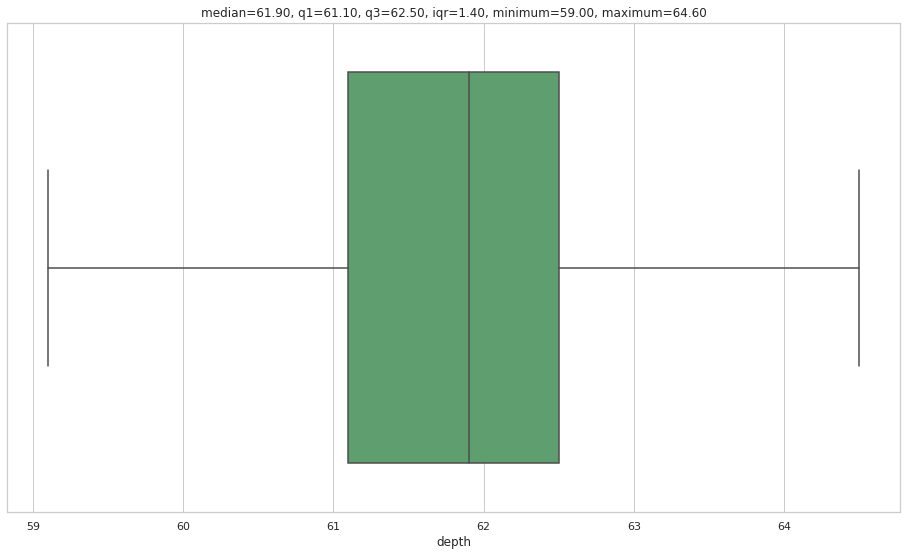

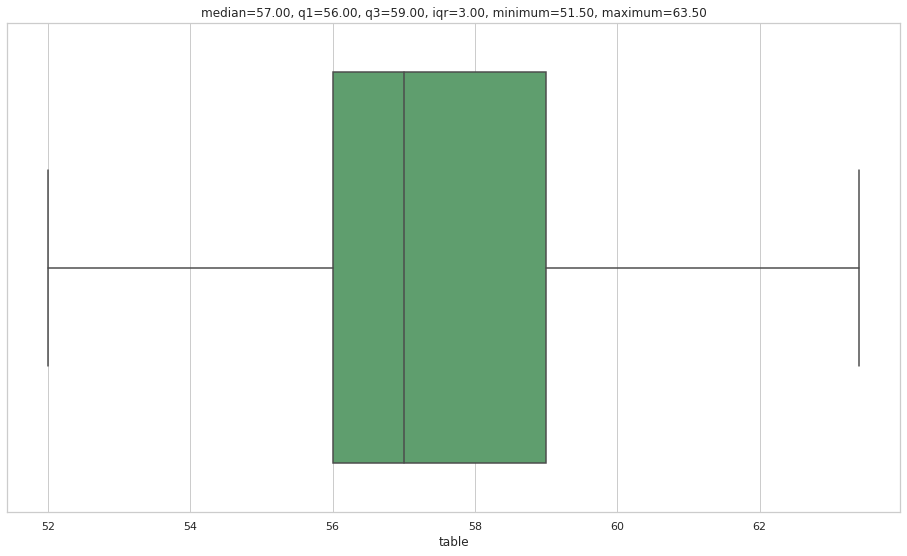

In [22]:
mp.box_plot(train, 'x')
mp.box_plot(train, 'y')
mp.box_plot(train, 'z')
mp.box_plot(train, 'carat')
mp.box_plot(train, 'depth')
mp.box_plot(train, 'table')

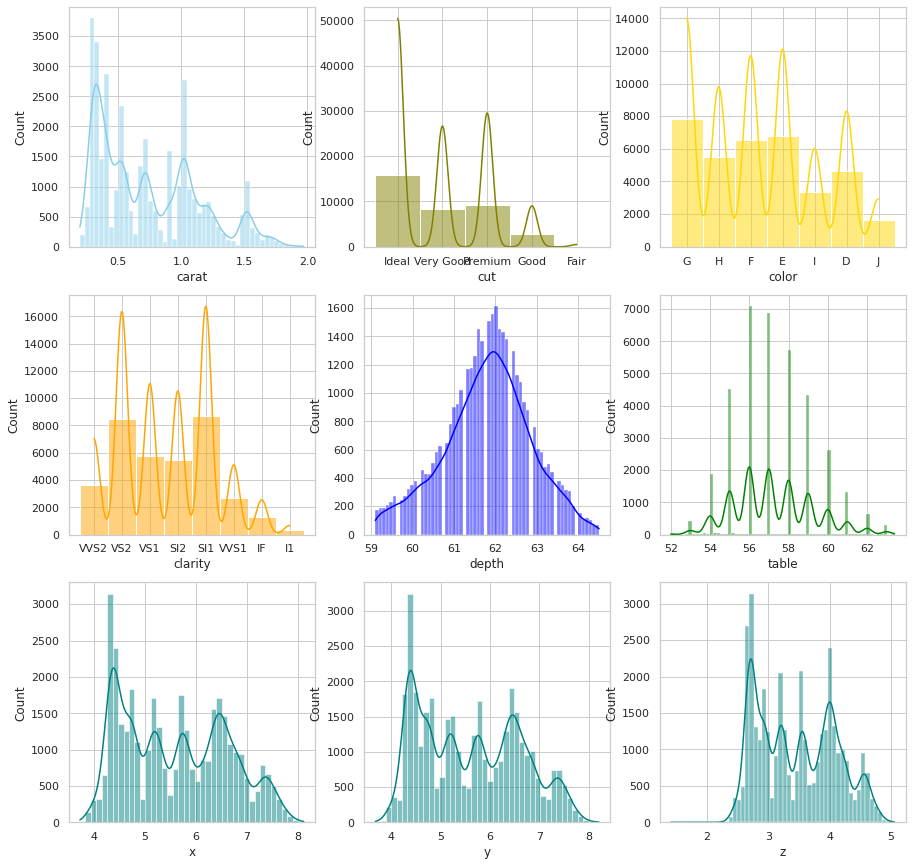

In [23]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

sns.histplot(data=train, x="carat", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=train, x="cut", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=train, x="color", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=train, x="clarity", kde=True, color="orange", ax=axs[1, 0])
sns.histplot(data=train, x="depth", kde=True, color="blue", ax=axs[1, 1])
sns.histplot(data=train, x="table", kde=True, color="green", ax=axs[1, 2])
sns.histplot(data=train, x="x", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=train, x="y", kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data=train, x="z", kde=True, color="teal", ax=axs[2, 2])
plt.show()

<AxesSubplot:>

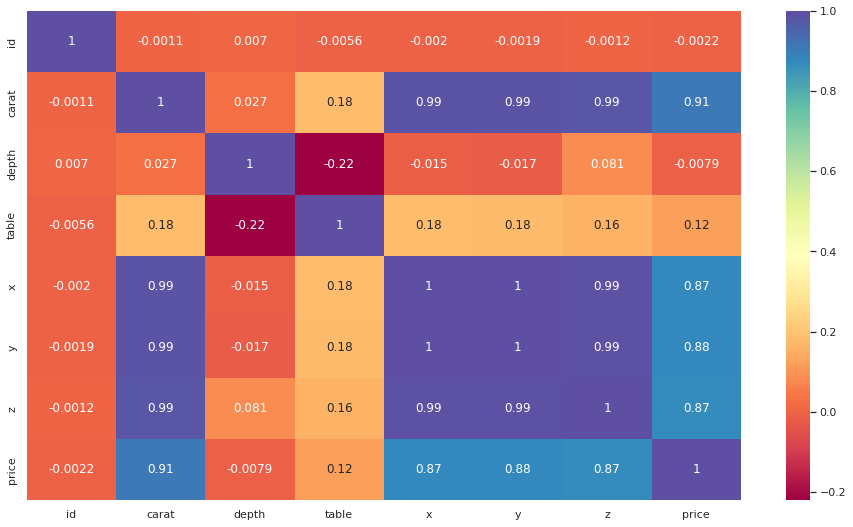

In [24]:
sns.heatmap(train.corr(),cmap="Spectral", annot= True)

/home/fer/miniconda3/envs/minimal_ds/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

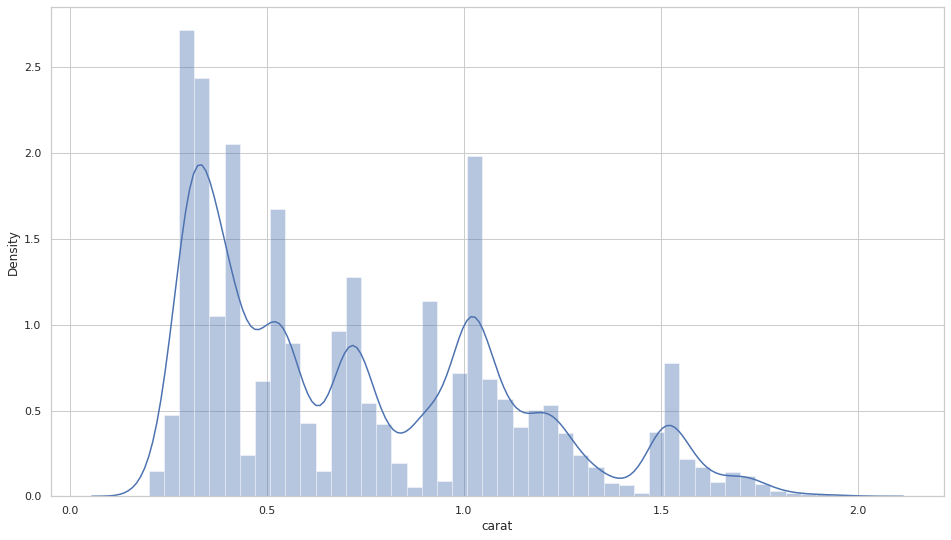

In [25]:
sns.distplot(train['carat'])

<AxesSubplot:xlabel='carat', ylabel='price'>

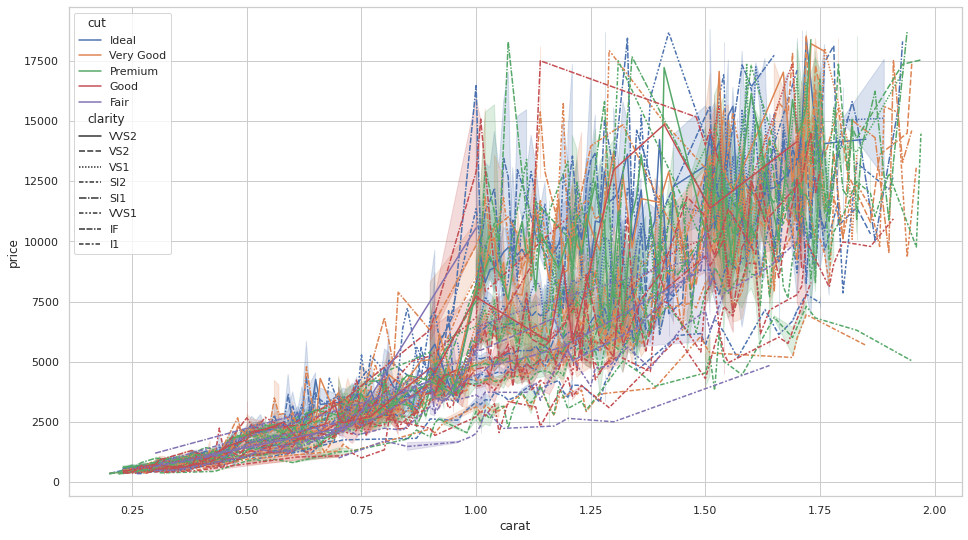

In [26]:
sns.lineplot(x="carat", y="price",hue="cut", style="clarity", data=train)

<AxesSubplot:xlabel='price', ylabel='carat'>

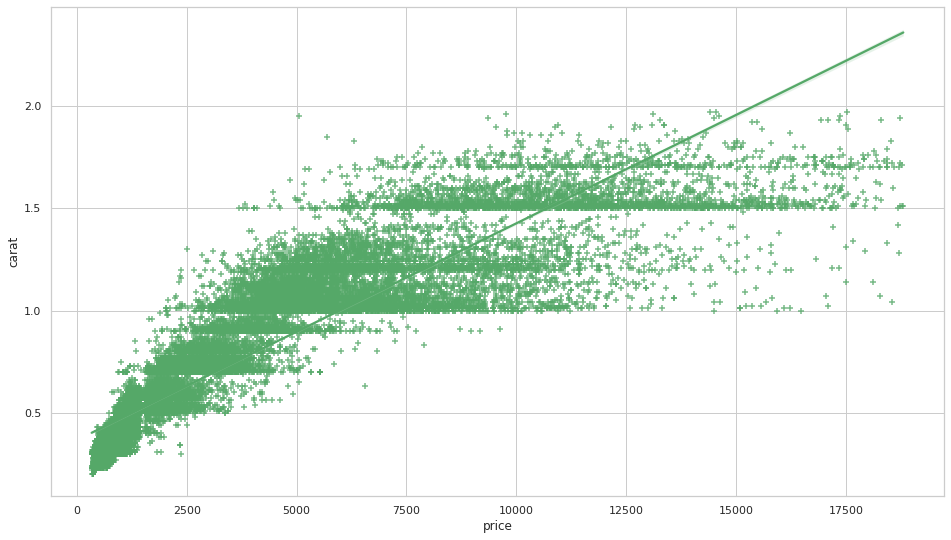

In [27]:
sns.regplot(x=train.price,y=train.carat , marker="+", color="g")

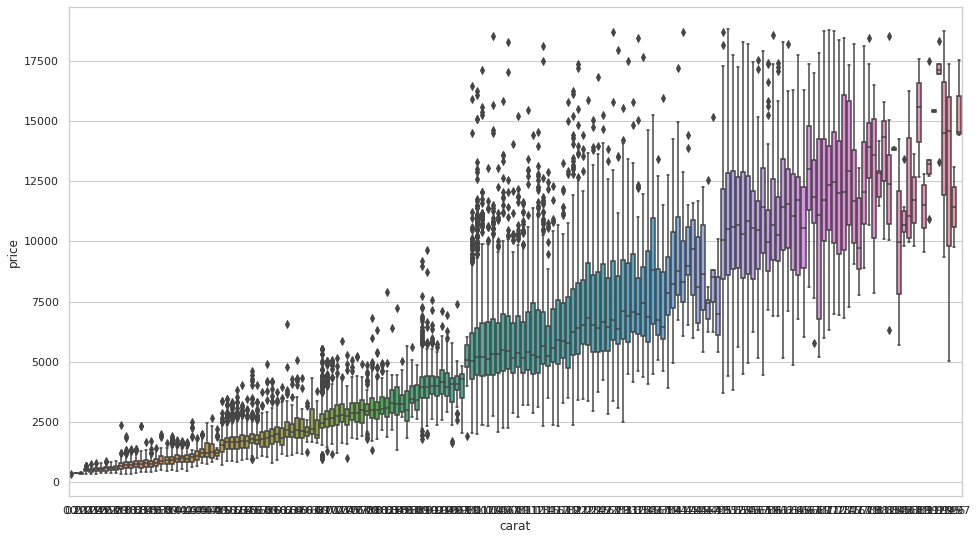

In [28]:
ax = sns.boxplot(x='carat', y ='price', data = train)

## Salvo a csv mi mega dataframe de entrenamiento super limpio.

In [29]:
train.to_csv('../data/new_train.csv', index= False)

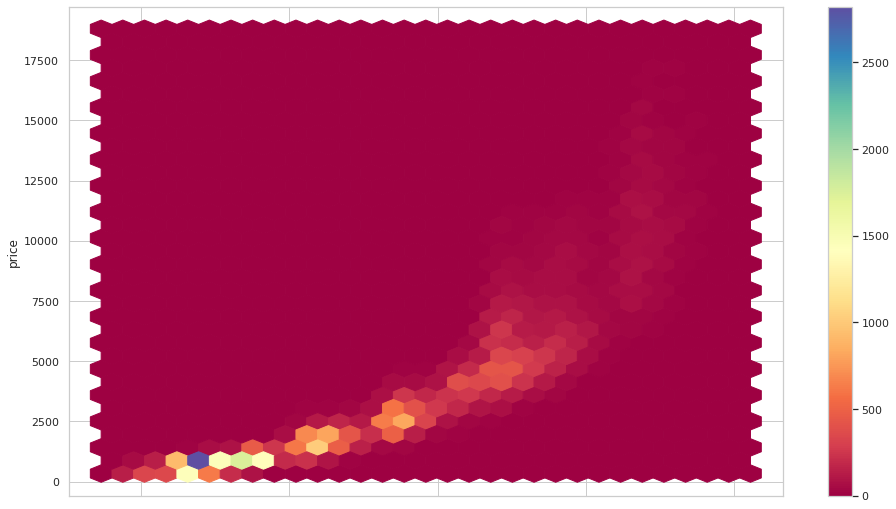

In [46]:
train.plot.hexbin(x='x',y='price',gridsize=30,cmap='Spectral');

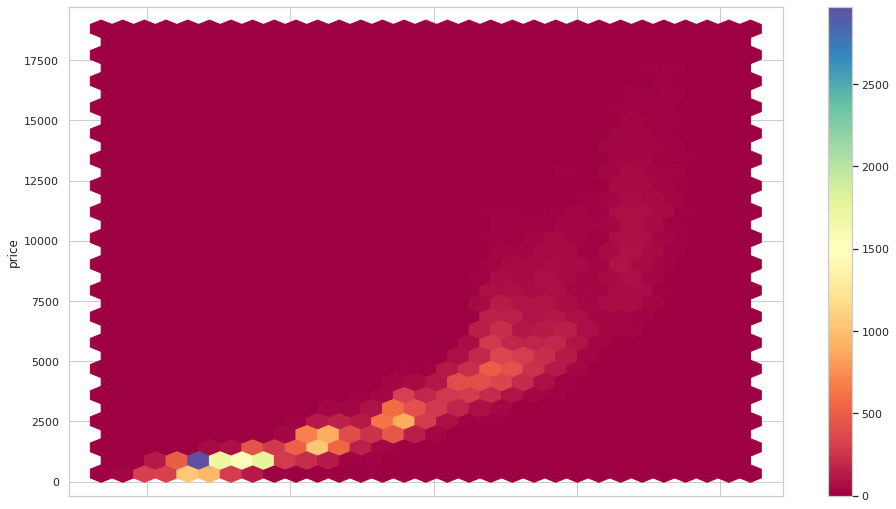

In [50]:
train.plot.hexbin(x='y',y='price',gridsize=30,cmap='Spectral');

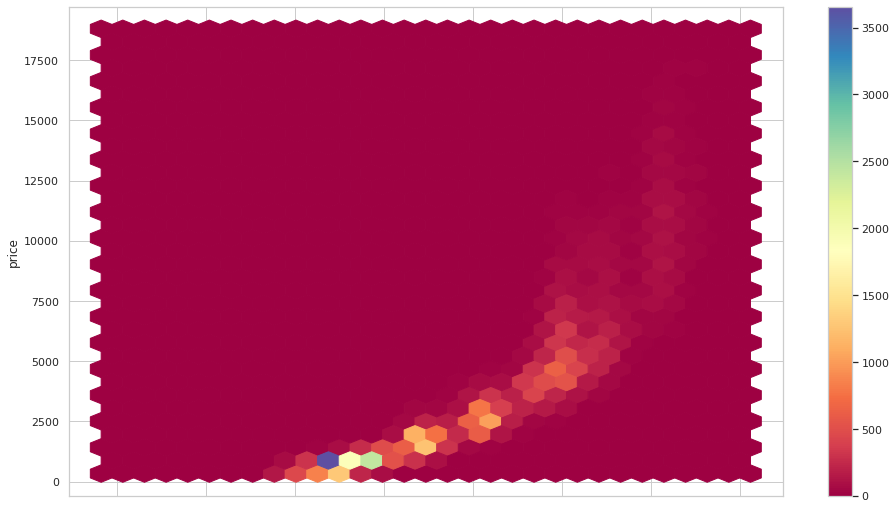

In [51]:
train.plot.hexbin(x='z',y='price',gridsize=30,cmap='Spectral');

In [30]:
#X, y, X_train, X_test, y_train, y_test = mp.magia(train, test)

In [31]:
#X.sample()

In [32]:
#X.carat.sample(10)

In [33]:
#max(X.carat)

In [34]:
#min(X.carat)